In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [2]:
# Ratings data
ratings = pd.read_csv("../data/raw/ratings.csv")
ratings = ratings.loc[:,["userId","movieId","rating"]]
# Movie data
movies = pd.read_csv("../data/raw/movies.csv")
movies = movies.loc[:,["movieId","title"]]
# Label data
tags = pd.read_csv("../data/raw/tags.csv")
def most_common(x):
    occ = {}
    max = x[0]
    for item in x:
        if not item in occ:
            occ[item] = 1
        else:
            occ[item] += 1
            if occ[item] > occ[max]:
                max = item
    return max
new_tags = []
for tag in tags['tag']:
    new_tags.append(most_common(tag.split()))
tags['tag'] = pd.Series(new_tags)


# Merge
data = pd.merge(movies, ratings)
data = pd.merge(data, tags)
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
# enc.fit(data['tag'])
data['tag'] = enc.fit_transform(data['tag'])
            

In [3]:
pivot_table = data.pivot_table(index = ["userId"],columns = ["title"],values = 'tag')

In [12]:
sim = pivot_table.corr(method='pearson', min_periods=1)

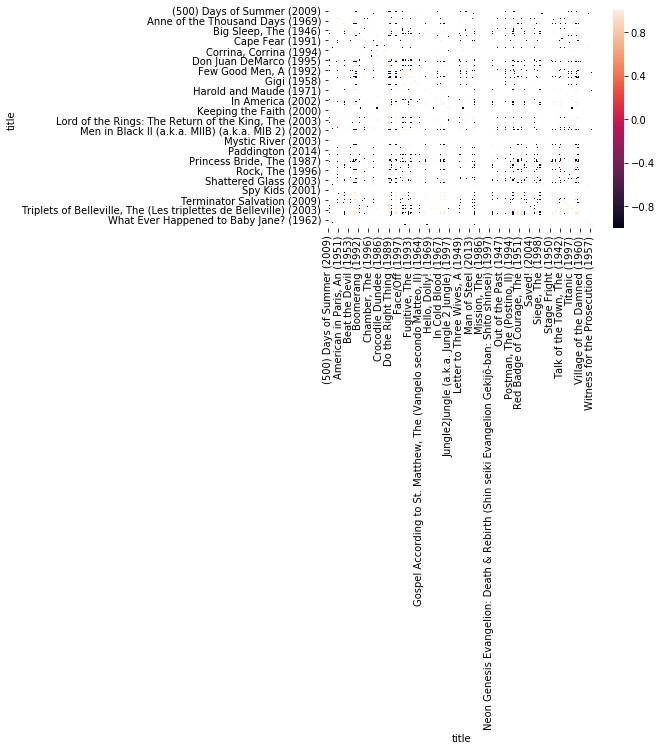

In [9]:
import seaborn as sns
sns.heatmap(sim)

In [6]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
# enc.fit(data['title'])
data['title'] = enc.fit_transform(data['title'])

In [7]:
from sklearn.cluster import KMeans
labels_to_use = ['tag', 'rating' ]
# k-means clustering
def kmeans(data, nclust=5):
    model = KMeans(nclust)
    model.fit(data[labels_to_use])
    cluster_labels = model.predict(data[labels_to_use])
    centers = model.cluster_centers_
    return (cluster_labels, centers)

cluster_labels, centers = kmeans(data)
kmeans = pd.DataFrame(cluster_labels)
data.insert((data.shape[1]),'kmeans',kmeans)

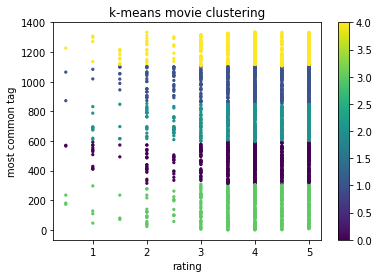

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('k-means movie clustering')
ax.set_xlabel('rating')
ax.set_ylabel('most common tag')
scatter = ax.scatter(data['rating'],data['tag'],
                     c=kmeans[0],s=5)

print(plt.colorbar(scatter))